In [1]:
import pandas as pd

#### Extracting and Preparing Data

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

**Enter dates range:**

In [6]:
# Define the start and end dates (yyyy-mm-dd)
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2024-11-06")

# Calculate the difference in months
months_diff = (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

print(months_diff)

34


**Enter tickers:**

In [8]:
# List of tickers for NSE stocks (append '.NS' to each NSE ticker)
tickers = ["HDFCBANK.NS", "ONGC.NS", "ICICIBANK.NS", "APOLLOHOSP.NS", "COLPAL.NS", "POWERGRID.NS", "TATAPOWER.NS", "KPITTECH.NS", "DLF.NS", "NMDC.NS"]  # Add more tickers as needed

# Download historical data for 1 or 2 years
data = yf.download(tickers, start=start_date, end=end_date)

# Extract only the closing prices
closing_prices = data['Close']

# Display the combined DataFrame
print(closing_prices.head())

# Optionally, save to a CSV file if you want
closing_prices.to_csv("nse_closing_prices.csv")

[*********************100%***********************]  10 of 10 completed

Ticker                     APOLLOHOSP.NS    COLPAL.NS      DLF.NS  \
Date                                                                
2022-01-03 00:00:00+00:00    4990.500000  1463.800049  394.750000   
2022-01-04 00:00:00+00:00    4964.600098  1464.800049  394.450012   
2022-01-05 00:00:00+00:00    4973.250000  1466.150024  402.049988   
2022-01-06 00:00:00+00:00    4964.450195  1456.900024  398.950012   
2022-01-07 00:00:00+00:00    5021.850098  1469.900024  400.600006   

Ticker                     HDFCBANK.NS  ICICIBANK.NS  KPITTECH.NS     NMDC.NS  \
Date                                                                            
2022-01-03 00:00:00+00:00  1519.650024    764.700012   608.150024  103.997322   
2022-01-04 00:00:00+00:00  1528.550049    772.849976   608.150024  104.381645   
2022-01-05 00:00:00+00:00  1564.849976    788.049988   594.200012  106.533844   
2022-01-06 00:00:00+00:00  1539.750000    785.049988   630.450012  106.572273   
2022-01-07 00:00:00+00:00  155

In [9]:
df = pd.read_csv(r"nse_closing_prices.csv")
df.head()

,Date,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
0,2022-01-03 00:00:00+00:00,4990.500000,1463.800049,394.750000,1519.650024,764.700012,608.150024,103.997322,143.050003,153.750000,223.399994
1,2022-01-04 00:00:00+00:00,4964.600098,1464.800049,394.450012,1528.550049,772.849976,608.150024,104.381645,147.800003,157.949997,226.300003
2,2022-01-05 00:00:00+00:00,4973.250000,1466.150024,402.049988,1564.849976,788.049988,594.200012,106.533844,150.350006,156.487503,223.500000
3,2022-01-06 00:00:00+00:00,4964.450195,1456.900024,398.950012,1539.750000,785.049988,630.450012,106.572273,150.800003,154.462494,228.449997
4,2022-01-07 00:00:00+00:00,5021.850098,1469.900024,400.600006,1550.550049,793.250000,711.250000,106.572273,157.050003,153.899994,229.800003


In [10]:
df.set_index('Date', inplace =True)

In [11]:
df.shape

(702, 10)

#### Calculating daily returns

In [13]:
import numpy as np

In [14]:
returns = df.pct_change()

In [15]:
returns.dropna(inplace = True)

In [16]:
returns.head()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS
Date,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.005190,0.000683,-0.000760,0.005857,0.010658,0.000000,0.003696,0.033205,0.027317,0.012981
2022-01-05 00:00:00+00:00,0.001742,0.000922,0.019267,0.023748,0.019667,-0.022938,0.020619,0.017253,-0.009259,-0.012373
2022-01-06 00:00:00+00:00,-0.001769,-0.006309,-0.007710,-0.016040,-0.003807,0.061006,0.000361,0.002993,-0.012940,0.022148
2022-01-07 00:00:00+00:00,0.011562,0.008923,0.004136,0.007014,0.010445,0.128162,0.000000,0.041446,-0.003642,0.005909
2022-01-10 00:00:00+00:00,0.008642,-0.003198,0.018347,0.005546,0.022061,0.048225,0.009376,0.008278,-0.005848,0.008486


__Equal weighted portfolio__

In [18]:
weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [19]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

In [20]:
returns.head()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio
Date,,,,,,,,,,,
2022-01-04 00:00:00+00:00,-0.005190,0.000683,-0.000760,0.005857,0.010658,0.000000,0.003696,0.033205,0.027317,0.012981,0.008845
2022-01-05 00:00:00+00:00,0.001742,0.000922,0.019267,0.023748,0.019667,-0.022938,0.020619,0.017253,-0.009259,-0.012373,0.005865
2022-01-06 00:00:00+00:00,-0.001769,-0.006309,-0.007710,-0.016040,-0.003807,0.061006,0.000361,0.002993,-0.012940,0.022148,0.003793
2022-01-07 00:00:00+00:00,0.011562,0.008923,0.004136,0.007014,0.010445,0.128162,0.000000,0.041446,-0.003642,0.005909,0.021396
2022-01-10 00:00:00+00:00,0.008642,-0.003198,0.018347,0.005546,0.022061,0.048225,0.009376,0.008278,-0.005848,0.008486,0.011992


In [21]:
returns['Portfolio'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Portfolio,701.0,0.001046,0.010808,-0.078438,-0.004073,0.001464,0.007576,0.04307


In [22]:
# Calculate cumulative returns (growth factor)
daily_cum_ret=(1+returns).cumprod()
daily_cum_ret.tail()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio
Date,,,,,,,,,,,
2024-10-30 00:00:00+00:00,1.399158,2.111730,2.093477,1.141447,1.715902,2.277892,2.156402,1.829081,2.071220,1.911370,1.994851
2024-10-31 00:00:00+00:00,1.407214,2.092157,2.076884,1.142171,1.689878,2.290964,2.133420,1.860538,2.086504,1.969785,1.999689
2024-11-01 00:00:00+00:00,1.409067,2.094548,2.086764,1.143224,1.689290,2.341939,2.142747,1.899685,2.094634,1.993957,2.014011
2024-11-04 00:00:00+00:00,1.394329,2.038940,2.001013,1.127957,1.670197,2.307983,2.177941,1.854596,2.051707,1.920546,1.977380
2024-11-05 00:00:00+00:00,1.395912,2.036924,2.024192,1.156747,1.695698,2.285620,2.257077,1.869276,2.059187,1.943151,1.997648


Assuming risk free rate to be 6% for the duration

In [24]:
daily_cum_ret['RF'] = 0.06

In [25]:
daily_cum_ret.tail()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio,RF
Date,,,,,,,,,,,,
2024-10-30 00:00:00+00:00,1.399158,2.111730,2.093477,1.141447,1.715902,2.277892,2.156402,1.829081,2.071220,1.911370,1.994851,0.06
2024-10-31 00:00:00+00:00,1.407214,2.092157,2.076884,1.142171,1.689878,2.290964,2.133420,1.860538,2.086504,1.969785,1.999689,0.06
2024-11-01 00:00:00+00:00,1.409067,2.094548,2.086764,1.143224,1.689290,2.341939,2.142747,1.899685,2.094634,1.993957,2.014011,0.06
2024-11-04 00:00:00+00:00,1.394329,2.038940,2.001013,1.127957,1.670197,2.307983,2.177941,1.854596,2.051707,1.920546,1.977380,0.06
2024-11-05 00:00:00+00:00,1.395912,2.036924,2.024192,1.156747,1.695698,2.285620,2.257077,1.869276,2.059187,1.943151,1.997648,0.06


In [26]:
# Calculate excess portfolio returns
daily_cum_ret['Portfolio_Excess'] = daily_cum_ret['Portfolio'] - daily_cum_ret['RF']

In [27]:
daily_cum_ret.tail()

,APOLLOHOSP.NS,COLPAL.NS,DLF.NS,HDFCBANK.NS,ICICIBANK.NS,KPITTECH.NS,NMDC.NS,ONGC.NS,POWERGRID.NS,TATAPOWER.NS,Portfolio,RF,Portfolio_Excess
Date,,,,,,,,,,,,,
2024-10-30 00:00:00+00:00,1.399158,2.111730,2.093477,1.141447,1.715902,2.277892,2.156402,1.829081,2.071220,1.911370,1.994851,0.06,1.934851
2024-10-31 00:00:00+00:00,1.407214,2.092157,2.076884,1.142171,1.689878,2.290964,2.133420,1.860538,2.086504,1.969785,1.999689,0.06,1.939689
2024-11-01 00:00:00+00:00,1.409067,2.094548,2.086764,1.143224,1.689290,2.341939,2.142747,1.899685,2.094634,1.993957,2.014011,0.06,1.954011
2024-11-04 00:00:00+00:00,1.394329,2.038940,2.001013,1.127957,1.670197,2.307983,2.177941,1.854596,2.051707,1.920546,1.977380,0.06,1.917380
2024-11-05 00:00:00+00:00,1.395912,2.036924,2.024192,1.156747,1.695698,2.285620,2.257077,1.869276,2.059187,1.943151,1.997648,0.06,1.937648


In [28]:
import matplotlib.pyplot as plt

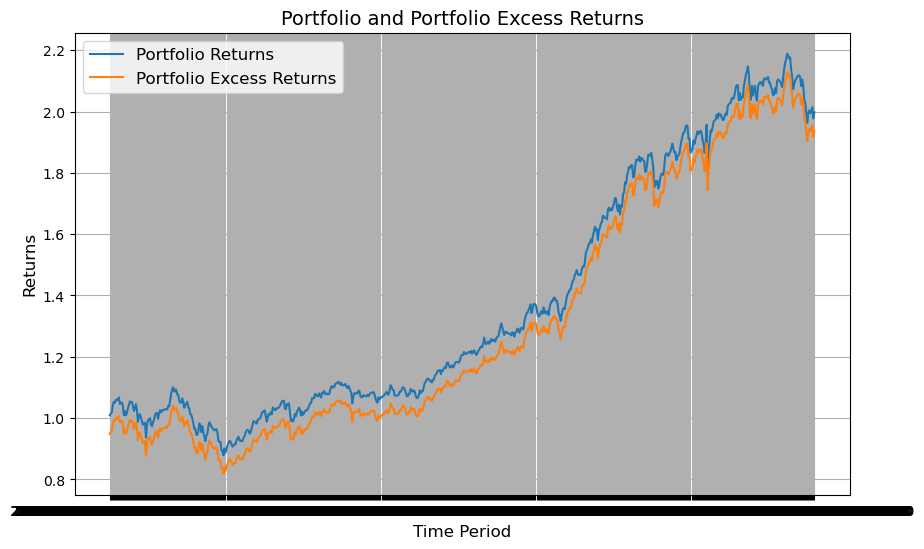

In [29]:
# Plot portfolio and portfolio excess returns
plt.figure(figsize=(10, 6))
plt.plot(daily_cum_ret.index, daily_cum_ret["Portfolio"], label="Portfolio Returns")
plt.plot(daily_cum_ret.index, daily_cum_ret["Portfolio_Excess"], label="Portfolio Excess Returns")

# Add titles and labels
plt.title("Portfolio and Portfolio Excess Returns", fontsize=14)
plt.xlabel("Time Period", fontsize=12)
plt.ylabel("Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

#### Benchmark data

get NIFTY 50 data for benchmark

In [32]:
nifty50_ticker = "^NSEI"

In [33]:
nifty50_data = yf.download(nifty50_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [34]:
nifty50_closing_prices = nifty50_data['Close']

In [35]:
# Display the closing prices for Nifty 50
print(nifty50_closing_prices.tail())

Ticker                            ^NSEI
Date                                   
2024-10-30 00:00:00+00:00  24340.849609
2024-10-31 00:00:00+00:00  24205.349609
2024-11-01 00:00:00+00:00  24304.349609
2024-11-04 00:00:00+00:00  23995.349609
2024-11-05 00:00:00+00:00  24213.300781


In [36]:
# Calculate daily returns
nifty50_returns = nifty50_closing_prices.pct_change().dropna()

In [37]:
# Display Nifty 50 returns
print(nifty50_returns.tail())

Ticker                        ^NSEI
Date                               
2024-10-30 00:00:00+00:00 -0.005150
2024-10-31 00:00:00+00:00 -0.005567
2024-11-01 00:00:00+00:00  0.004090
2024-11-04 00:00:00+00:00 -0.012714
2024-11-05 00:00:00+00:00  0.009083


In [38]:
# Calculate cumulative returns (growth factor)
n50_cum_ret=(1+nifty50_returns).cumprod()
n50_cum_ret.tail()

Ticker,^NSEI
Date,
2024-10-30 00:00:00+00:00,1.380986
2024-10-31 00:00:00+00:00,1.373299
2024-11-01 00:00:00+00:00,1.378915
2024-11-04 00:00:00+00:00,1.361384
2024-11-05 00:00:00+00:00,1.373750


In [39]:
n50_cum_ret['RF'] = 0.06

In [40]:
n50_cum_ret['Market_Excess'] = n50_cum_ret['^NSEI'] - n50_cum_ret['RF']

In [41]:
n50_cum_ret.tail()

Ticker,^NSEI,RF,Market_Excess
Date,,,
2024-10-30 00:00:00+00:00,1.380986,0.06,1.320986
2024-10-31 00:00:00+00:00,1.373299,0.06,1.313299
2024-11-01 00:00:00+00:00,1.378915,0.06,1.318915
2024-11-04 00:00:00+00:00,1.361384,0.06,1.301384
2024-11-05 00:00:00+00:00,1.373750,0.06,1.313750


**Combining the required dataframes:**

In [43]:
FamaFrenchData = pd.DataFrame()

In [44]:
n50_cum_ret.shape

(701, 3)

In [45]:
daily_cum_ret.shape

(701, 13)

In [46]:
Market_Excess = n50_cum_ret['Market_Excess'].reset_index()

In [47]:
Market_Excess.head()

,Date,Market_Excess
0,2022-01-04 00:00:00+00:00,0.950187
1,2022-01-05 00:00:00+00:00,0.956995
2,2022-01-06 00:00:00+00:00,0.946820
3,2022-01-07 00:00:00+00:00,0.950610
4,2022-01-10 00:00:00+00:00,0.961423


In [48]:
Portfolio_Excess = daily_cum_ret["Portfolio_Excess"].reset_index()

In [49]:
Portfolio_Excess.head()

,Date,Portfolio_Excess
0,2022-01-04 00:00:00+00:00,0.948845
1,2022-01-05 00:00:00+00:00,0.954761
2,2022-01-06 00:00:00+00:00,0.958610
3,2022-01-07 00:00:00+00:00,0.980404
4,2022-01-10 00:00:00+00:00,0.992880


In [50]:
# Convert 'Date' column in both dataframes to datetime64 (make sure they're both in the same format)
Portfolio_Excess['Date'] = pd.to_datetime(Portfolio_Excess['Date'], errors='coerce')  # Coerce invalid formats to NaT
Market_Excess['Date'] = pd.to_datetime(Market_Excess['Date'], errors='coerce')  # Same here

# Now merge on 'Date' (after converting to datetime)
FamaFrenchData = pd.merge(Portfolio_Excess, Market_Excess, on='Date', how='inner')

In [51]:
nat_count = FamaFrenchData['Date'].isna().sum()

In [52]:
nat_count

0

In [53]:
FamaFrenchData.set_index('Date', inplace = True)

In [54]:
FamaFrenchData.tail()

,Portfolio_Excess,Market_Excess
Date,,
2024-10-30 00:00:00+00:00,1.934851,1.320986
2024-10-31 00:00:00+00:00,1.939689,1.313299
2024-11-01 00:00:00+00:00,1.954011,1.318915
2024-11-04 00:00:00+00:00,1.917380,1.301384
2024-11-05 00:00:00+00:00,1.937648,1.313750


#### Calculating Beta

**with Covariance and variance of benchmark**

In [57]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

In [58]:
covariance_matrix

,Portfolio_Excess,Market_Excess
Portfolio_Excess,0.161876,0.062086
Market_Excess,0.062086,0.024561


In [59]:
# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

0.06208580397155888


In [60]:
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

0.02456062799704285


In [61]:
# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

2.527858977345129


**Calculating beta with CAPM**

<img src="screenshots/capm.JPG" alt="Image Description" width="50%">

In [64]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.9694894195619993
2.5278589773451303
